In [1]:
!curl "https://python-course.eu/data/mnist/mnist_train.csv" -o "mnist_train.csv"
!curl "https://python-course.eu/data/mnist/mnist_test.csv" -o "mnist_test.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  104M    0  3233    0     0   4416      0  6:53:33 --:--:--  6:53:33  4416
 62  104M   62 65.6M    0     0  49.6M      0  0:00:02  0:00:01  0:00:01 49.6M
100  104M  100  104M    0     0  62.7M      0  0:00:01  0:00:01 --:--:-- 62.7M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 17.4M    0  3237    0     0   3226      0  1:34:29  0:00:01  1:34:28  3230
  4 17.4M    4  829k    0     0   508k      0  0:00:35  0:00:01  0:00:34  508k
 99 17.4M   99 17.3M    0     0  6744k      0  0:00:02  0:00:02 --:--:-- 6745k
100 17.4M  100 17.4M    0     0  6787k      0  0:0

In [1]:
# Read csv file
import csv
import numpy as np

with open('mnist_train.csv') as f:
    reader = csv.reader(f)
    train = np.array(list(reader)).astype('int')

np.random.seed(0)
np.random.shuffle(train)
# print(train)
# print(train.shape)
# print(train)

with open('mnist_test.csv') as f:
    reader = csv.reader(f)
    test = np.array(list(reader)).astype('int')

# print(test)
# print(test.shape)
# print(test)

In [3]:
# Extract labels
train_labels = train[:, 0]
test_labels = test[:, 0]

# Extract features
train_features = train[:, 1:]
test_features = test[:, 1:]

# Normalize features
train_features = train_features / 255
test_features = test_features / 255

# One-hot encode labels
train_labels = np.eye(10)[train_labels]
test_labels = np.eye(10)[test_labels]

print(test_labels)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
import importlib, os
import nn
importlib.reload(nn)

# Folder to save models
folder = 'models'

# Train neural networks
models = []
for x in range(10):

    # Fully connected neural network
    layers = [
        nn.LinearLayer(784, 200),
        nn.BatchNorm1DLayer(200),
        nn.ReLULayer(),
        # nn.DropoutLayer(0.1),
        nn.LinearLayer(200, 100),
        nn.BatchNorm1DLayer(100),
        nn.ReLULayer(),
        # nn.DropoutLayer(0.1),
        nn.LinearLayer(100, 10),
        # nn.BatchNorm1DLayer(10),
        nn.SoftmaxLayer()
    ]
    
    if os.path.exists(f'{folder}/model_{x}.pkl'):
        models.append(nn.load_model(f'{folder}/model_{x}.pkl'))
        print(f'Loaded model {x} from file')
    else:
        models.append(nn.NeuralNetwork(layers, 784, 10))
        # test_features, test_labels only used to calculate accuracy
        models[x].train(train_features, train_labels, 0.003, 800, 1000, test_features, test_labels, lr_decay=0.98, epoch_delay=50) # lr, epochs, batch_size

        # Save model
        if not os.path.exists(folder):
            os.mkdir(folder)
        models[x].save(f'{folder}/model_{x}.pkl')
        print(f'Saved model {x} to file')
    

Loaded model 0 from file


Epoch: 799, Loss: 0.11548361723220707, Accuracy: 0.9493: 100%|██████████| 800/800 [01:37<00:00,  8.21it/s]


Saved model 1 to file


Epoch: 799, Loss: 0.10402075559607346, Accuracy: 0.9567: 100%|██████████| 800/800 [01:33<00:00,  8.53it/s]


Saved model 2 to file


Epoch: 799, Loss: 0.1204508573317008, Accuracy: 0.9534: 100%|██████████| 800/800 [01:32<00:00,  8.61it/s] 


Saved model 3 to file


Epoch: 799, Loss: 0.1108384392330195, Accuracy: 0.954: 100%|██████████| 800/800 [01:33<00:00,  8.57it/s]  


Saved model 4 to file


Epoch: 799, Loss: 0.12455499577261638, Accuracy: 0.9566: 100%|██████████| 800/800 [01:30<00:00,  8.85it/s]


Saved model 5 to file


Epoch: 799, Loss: 0.11127570487051049, Accuracy: 0.9513: 100%|██████████| 800/800 [01:32<00:00,  8.67it/s]


Saved model 6 to file


Epoch: 799, Loss: 0.16696795095562011, Accuracy: 0.9483: 100%|██████████| 800/800 [01:32<00:00,  8.66it/s]


Saved model 7 to file


Epoch: 799, Loss: 0.1010837121476351, Accuracy: 0.9565: 100%|██████████| 800/800 [01:29<00:00,  8.97it/s] 


Saved model 8 to file


Epoch: 799, Loss: 0.12314468149793314, Accuracy: 0.9583: 100%|██████████| 800/800 [01:30<00:00,  8.81it/s] 


Saved model 9 to file


In [9]:
# Ensemble scores
print('Mean scoring: {:.2f}%'.format(nn.score_ensemble_mean(models, test_features, test_labels) * 100))
print('Mode scoring: {:.2f}%'.format(nn.score_ensemble_mode(models, test_features, test_labels) * 100))

Mean scoring: 97.21%
Mode scoring: 97.00%


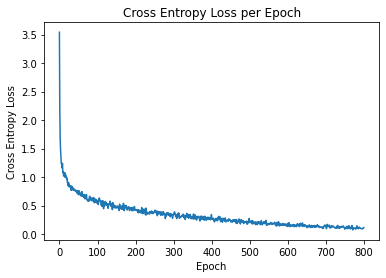

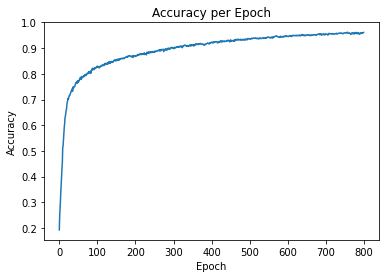

Predicted: 7
Actual: 7


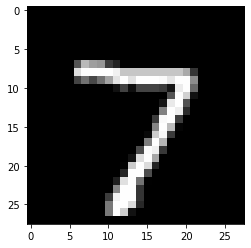

In [10]:
%matplotlib inline

# Single model loss and accuracy
models[0].plot_loss()
models[0].plot_acc()

# Test prediction from an index
models[0].test_pred(0, test_features, test_labels)

In [17]:
train_features_2d = train_features.reshape(-1, 28, 28)
test_features_2d = test_features.reshape(-1, 28, 28)
train_features_2d.shape

(60000, 28, 28)